## Observations and Insights 

# I created a seperate document which include the 3 observation. Will commit to Git. Name of the document Matplotlib_HW_Observation.docx

I can also describe summary of the observation here as well 1) Data Quality issue: Duplicates, redundancies and inconsistencies in the study results 2)is based on the Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin. The Drug Regimen = Capomulin works on mouse ID = b742 3) Conclusion: Size of the tumor increases as weight increases. Please refer to my document for the details

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [4]:
# Read the mouse data 
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [62]:
#the study results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset --  mouse data  and study results
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
number_of_mice = merge_df["Mouse ID"].count()
number_of_mice 


1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df =merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]
dup_mouse_timepoint = pd.DataFrame(dup_df)
dup_mouse_timepoint 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
#Get all the data for the duplicate mouse ID. 
dup_mouse_df =merge_df[merge_df.duplicated(["Mouse ID"])]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_df = dup_mouse_df.drop_duplicates("Mouse ID")
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1874,z795,Naftisol,Female,13,29,5,46.833475,0


In [63]:
# Checking the number of mice in the clean DataFrame.
clean_data_df = { "Number_Mouse_After_CleanUP":len(clean_mouse_df)}
Number_Mouse = pd.DataFrame([clean_data_df])

Number_Mouse


,Number_Mouse_After_CleanUP
0,237


## Summary Statistics

In [12]:
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1874,z795,Naftisol,Female,13,29,5,46.833475,0


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create a group by object by Drug Regimen
# Group by becoames the rows


Groupby_Regimen=clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

Mean_Drug_Regimen = Groupby_Regimen.mean()

#clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

Median_Drug_Regimen = Groupby_Regimen.median()

Variance_Drug_Regimen = Groupby_Regimen.var()
SD_Drug_Regimen = Groupby_Regimen.std()
Sem_Drug_Regimen = Groupby_Regimen.sem()
Summary_table = {"Mean Drug Regimen" : Mean_Drug_Regimen,
                "Median Drug Regimen" :Median_Drug_Regimen,
                "Variance Drug Regimen":Variance_Drug_Regimen,
                "SD Drug Regimen":SD_Drug_Regimen,
                "Sem Drug Regimen" :Sem_Drug_Regimen}

Stat_Summary_table = pd.DataFrame(Summary_table)
Stat_Summary_table

,Mean Drug Regimen,Median Drug Regimen,Variance Drug Regimen,SD Drug Regimen,Sem Drug Regimen
Drug Regimen,,,,,
Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593
Ceftamin,46.503051,46.370798,0.568299,0.753856,0.164505
Infubinol,46.541247,46.870483,5.689821,2.385335,0.477067
Ketapril,47.389175,47.059664,1.612964,1.270025,0.264819
Naftisol,46.796098,46.621301,0.942076,0.970606,0.202385
Placebo,47.125589,46.989764,1.141526,1.068422,0.218091
Propriva,47.077791,46.847642,1.482589,1.217616,0.248545
Ramicane,43.944859,45.521875,5.831150,2.414777,0.482955
Stelasyn,47.470830,47.054185,1.493585,1.222123,0.254830


## Bar and Pie Charts

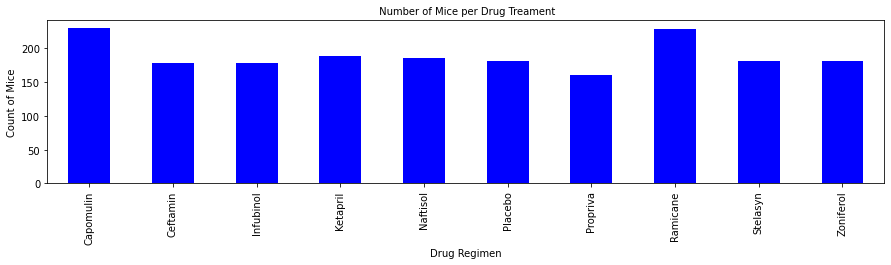

<Figure size 432x288 with 0 Axes>

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Drug_Regimen_gby = merge_df.groupby(["Drug Regimen"])
# find out how many mouse took which treatment
drugRegimen_per_mice = Drug_Regimen_gby["Mouse ID"].count()
#drugRegimen_df_ID   = dup_mouse_df.groupby(["Drug Regimen"])["Mouse ID"].count()

drugRegimen_per_mice.plot(kind="bar",facecolor="blue",figsize=(15,3))
plt.ylabel("Count of Mice",fontsize = 10)
plt.title(" Number of Mice per Drug Treament", fontsize = 10)
plt.show()
plt.tight_layout()



Text(0, 0.5, 'Count of Mice')

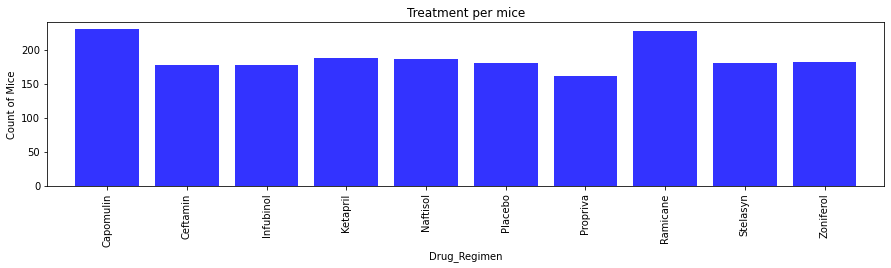

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# FIX
Treatment_List=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


drugRegimen_per_mice = Drug_Regimen_gby["Mouse ID"].count()
x_axis = np.arange(len(drugRegimen_per_mice))

fig1, ax1 =plt.subplots(figsize=(15,3))
plt.bar(x_axis, drugRegimen_per_mice, color='b', alpha=0.8, align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol', 'Ketapril', 'Naftisol',
 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
    
#plt.xticks(tick_locations, ['Capomulin', 'Ceftamin' ,'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',  
 # 'Propriva', 'Ramicane', 'Stelasyn' 'Zoniferol'],rotation='vertical')
 # Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(drugRegimen_per_mice)+10)
 # Give our chart some labels and a tile
plt.title("Treatment per mice")
plt.xlabel("Drug_Regimen")
plt.ylabel("Count of Mice")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#data_gender_gby = merge_df.groupby(["Sex"])
data_gender_gby = merge_df.groupby(["Sex"])
gender_count = data_gender_gby["Mouse ID"].count()
#gender_count.head()
gender_perccentage = (gender_count/237) * 100
Mouse_Gender_data = { "GenderCount" :gender_count ,
            "Percentage Count": gender_perccentage}
Mouse_Gender_summary = pd.DataFrame(Mouse_Gender_data)
Mouse_Gender_summary 


,GenderCount,Percentage Count
Sex,,
Female,935,394.514768
Male,958,404.219409


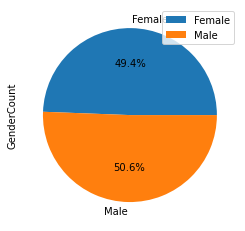

In [47]:
#Pie Plot using Pandas
#plt.title(" Distribution Male vs Female")
gender_pie = Mouse_Gender_summary.plot(kind="pie", y="GenderCount",autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x19320e09eb0>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Male'),
  Text(0.7230187918402547, 0.8290017048509963, 'Female')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

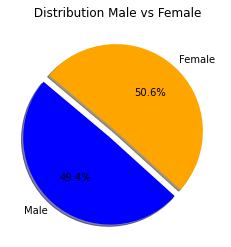

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
gender_count = data_gender_gby["Mouse ID"].count()

# The colors of each section of the pie chart
colors = ["blue", "orange"]
plt.title(" Distribution Male vs Female")
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Need to delete

Capomulin_df = merge_df.loc[merge_df["Drug Regimen"] =="Capomulin",:]
Ramicane_df = merge_df.loc[merge_df["Drug Regimen"] =="Ramicane",:]
Infubinol_df = merge_df.loc[merge_df["Drug Regimen"] =="Infubinol",:]
Ceftamin_df = merge_df.loc[merge_df["Drug Regimen"] =="Ceftamin",:]
# Capomulin
Capomulin_Tumor_Volume_per_mice = Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
#Ramicane
Ramicane_Tumor_Volume_per_mice = Ramicane_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
#Infubinol
Infubinol_Tumor_Volume_per_mice = Infubinol_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
Ceftamin_Tumor_Volume_per_mice = Ceftamin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()

#last (greatest) timepoint for each mouse

Capomulin_max_per_mice = Capomulin_df.groupby("Mouse ID")["Timepoint"].max()
Ramicane_max_per_mice =  Ramicane_df.groupby("Mouse ID")["Timepoint"].max()
Infubinol_max_per_mice = Infubinol_df.groupby("Mouse ID")["Timepoint"].max()
Ceftamin_max_per_mice = Ceftamin_df.groupby("Mouse ID")["Timepoint"].max()



In [49]:
#.. Filter Capomulin from the data set 
Capomulin_df = merge_df.loc[merge_df["Drug Regimen"] =="Capomulin",:]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [50]:
# Filter Ramicane from the data set
Ramicane_df = merge_df.loc[merge_df["Drug Regimen"] =="Ramicane",:]
Ramicane_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [68]:
# Filter Infubinol from the data set
Infubinol_df = merge_df.loc[merge_df["Drug Regimen"] =="Infubinol",:]
Infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [69]:
#. Filter Ceftamin from the data set
Ceftamin_df = merge_df.loc[merge_df["Drug Regimen"] =="Ceftamin",:]
Ceftamin_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [70]:
# Capomulin
#Calculate the final tumor volume of each mouse across 
Capomulin_Tumor_Volume_per_mice = Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
#Ramicane
Ramicane_Tumor_Volume_per_mice = Ramicane_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
#Infubinol
Infubinol_Tumor_Volume_per_mice = Infubinol_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
#Ceftamin
Ceftamin_Tumor_Volume_per_mice = Ceftamin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].sum()
#last (greatest) timepoint for each mouse

Capomulin_max_per_mice = Capomulin_df.groupby("Mouse ID")["Timepoint"].max()
Ramicane_max_per_mice =  Ramicane_df.groupby("Mouse ID")["Timepoint"].max()
Infubinol_max_per_mice = Infubinol_df.groupby("Mouse ID")["Timepoint"].max()
Ceftamin_max_per_mice = Ceftamin_df.groupby("Mouse ID")["Timepoint"].max()


In [53]:
#Capomulin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_max_timepoint_per_mice = pd.DataFrame(Capomulin_max_per_mice)
#Capomulin_max_timepoint_per_mice_merge = pd.merge(Capomulin_max_timepoint_per_mice,merge_df, on =("Mouse ID", "Timepoint"), how = "left")
Capomulin_max_timepoint_per_mice_merge = pd.merge(Capomulin_max_timepoint_per_mice,Capomulin_df, on =("Mouse ID", "Timepoint"), how = "left")
Capomulin_max_timepoint_per_mice_merge 




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [71]:
#Ramicane
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_max_timepoint_per_mice = pd.DataFrame(Ramicane_max_per_mice)

Ramicane_max_timepoint_per_mice_merge = pd.merge(Ramicane_max_timepoint_per_mice,Ramicane_df, on =("Mouse ID", "Timepoint"), how = "left")
Ramicane_max_timepoint_per_mice_merge 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [72]:
#Infubinol
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_max_timepoint_per_mice = pd.DataFrame(Infubinol_max_per_mice)

Infubinol_max_timepoint_per_mice_merge = pd.merge(Infubinol_max_timepoint_per_mice,Infubinol_df, on =("Mouse ID", "Timepoint"), how = "left")
Infubinol_max_timepoint_per_mice_merge 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [73]:
#Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_max_timepoint_per_mice = pd.DataFrame(Ceftamin_max_per_mice)

Ceftamin_max_timepoint_per_mice_merge = pd.merge(Ceftamin_max_timepoint_per_mice,Ceftamin_df, on =("Mouse ID", "Timepoint"), how = "left")
Ceftamin_max_timepoint_per_mice_merge 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [55]:
#Ramicane Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ramicane_max_timepoint_per_mice_merge 
# Locate the rows which contain mice on each drug and get the tumor volumes

Ramicane_Tumor_Volume= Ramicane_max_timepoint_per_mice_merge["Tumor Volume (mm3)"]


# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles =  Ramicane_Tumor_Volume.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] # bottom of the box
upperq = quartiles[0.75]# top of the box
iqr = upperq-lowerq # range of values in the box - use to find the ends of the whiskers


print(f"The lower quartile of Ramicane treatment is: {lowerq}")
print(f"The upper quartile of Ramicane treatment is: {upperq}")
print(f"The interquartile range Ramicane treatmentof  is: {iqr}")
print(f"The the median of Ramicane treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr) # bottom whisker
upper_bound = upperq + (1.5*iqr) # upper tre
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Ramicane treatment is: 31.56046955
The upper quartile of Ramicane treatment is: 40.65900627
The interquartile range Ramicane treatmentof  is: 9.098536719999998
The the median of Ramicane treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [30]:
# #Capomulin Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin_Tumor_Volume= Capomulin_max_timepoint_per_mice_merge["Tumor Volume (mm3)"]

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles =  Capomulin_Tumor_Volume.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] # bottom of the box
upperq = quartiles[0.75]# top of the box
iqr = upperq-lowerq # range of values in the box - use to find the ends of the whiskers


print(f"The lower quartile of Capomulin treatment is: {lowerq}")
print(f"The upper quartile of Capomulin treatment is: {upperq}")
print(f"The interquartile range Capomulin treatmentof  is: {iqr}")
print(f"The the median of Capomulin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr) # bottom whisker
upper_bound = upperq + (1.5*iqr) # upper tre
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin treatment is: 32.37735684
The upper quartile of Capomulin treatment is: 40.1592203
The interquartile range Capomulin treatmentof  is: 7.781863460000004
The the median of Capomulin treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [56]:
#Infubinol  Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
Infubinol_Tumor_Volume= Infubinol_max_timepoint_per_mice_merge["Tumor Volume (mm3)"]

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles =  Infubinol_Tumor_Volume.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] # bottom of the box
upperq = quartiles[0.75]# top of the box
iqr = upperq-lowerq # range of values in the box - use to find the ends of the whiskers


print(f"The lower quartile of Infubinol treatment is: {lowerq}")
print(f"The upper quartile of Infubinol treatment is: {upperq}")
print(f"The interquartile range Infubinol treatmentof  is: {iqr}")
print(f"The the median of Infubinol treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr) # bottom whisker
upper_bound = upperq + (1.5*iqr) # upper tre
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol treatment is: 54.04860769
The upper quartile of Infubinol treatment is: 65.52574285
The interquartile range Infubinol treatmentof  is: 11.477135160000003
The the median of Infubinol treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [32]:
#Ceftamin  Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes

Ceftamin_Tumor_Volume= Ceftamin_max_timepoint_per_mice_merge["Tumor Volume (mm3)"]

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles =  Ceftamin_Tumor_Volume.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] # bottom of the box
upperq = quartiles[0.75]# top of the box
iqr = upperq-lowerq # range of values in the box - use to find the ends of the whiskers


print(f"The lower quartile of Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of Ceftamin treatment is: {upperq}")
print(f"The interquartile range Ceftamin treatmentof  is: {iqr}")
print(f"The the median of Infubinol treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr) # bottom whisker
upper_bound = upperq + (1.5*iqr) # upper tre
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin treatment is: 48.72207785
The upper quartile of Ceftamin treatment is: 64.29983003
The interquartile range Ceftamin treatmentof  is: 15.577752179999997
The the median of Infubinol treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [33]:
#Box PLOTS

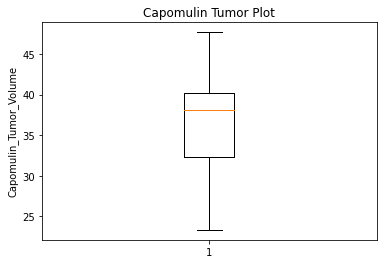

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin
# Example outlier plot of reaction times
Capomulin_Tumor_Volume
fig, ax = plt.subplots()
ax.set_title('Capomulin Tumor Plot')
ax.set_ylabel('Capomulin_Tumor_Volume')
ax.boxplot(Capomulin_Tumor_Volume)
plt.show()

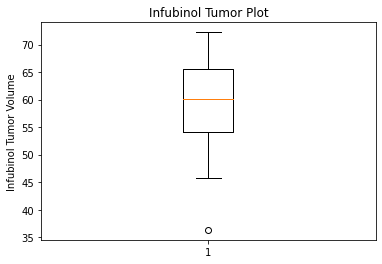

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Infubinol
# Example outlier plot of reaction times

fig, ax = plt.subplots()
ax.set_title('Infubinol Tumor Plot')
ax.set_ylabel('Infubinol Tumor Volume')
ax.boxplot(Infubinol_Tumor_Volume)
plt.show()

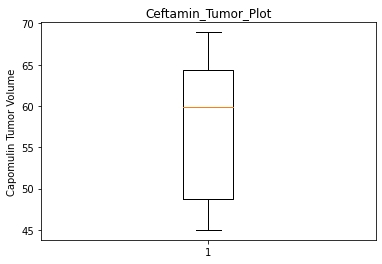

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Ceftamin_Tumor_Volume
# Example outlier plot of reaction times

fig, ax = plt.subplots()
ax.set_title('Ceftamin_Tumor_Plot')
ax.set_ylabel('Capomulin Tumor Volume')
ax.boxplot(Ceftamin_Tumor_Volume)
plt.show()


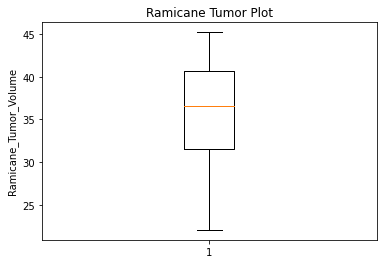

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Ramicane
# Example outlier plot of reaction times

fig, ax = plt.subplots()
ax.set_title('Ramicane Tumor Plot')
ax.set_ylabel('Ramicane_Tumor_Volume')
ax.boxplot(Ramicane_Tumor_Volume)
plt.show()


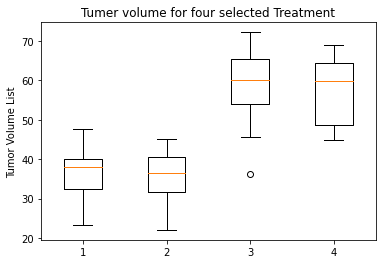

In [77]:
Treatment_List=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Tumor_Volume_List =[Capomulin_Tumor_Volume, Ramicane_Tumor_Volume,Infubinol_Tumor_Volume,Ceftamin_Tumor_Volume]


mosue_data_treatmentData = pd.DataFrame(mouse_metadata)
# Type is series .... One column only
#type (mosue_data_treatmentData["Drug Regimen"])
#Treatment_List=mosue_data_treatmentData["Drug Regimen"].unique()
#Treatment_List
fig, ax = plt.subplots()
ax.set_title('Tumer volume for four selected Treatment')
ax.set_ylabel('Tumor Volume List')
ax.boxplot(Tumor_Volume_List)
plt.show()

## Line and Scatter Plots

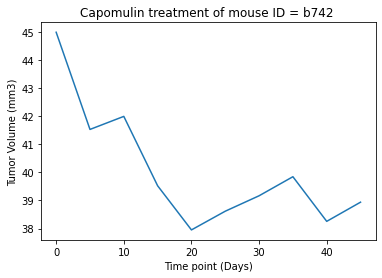

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Capomulin_df .. Mouse ID = b742
Capomulin_b742_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]

#df1 = mouse_metadata.loc[mouse_metadata["Mouse ID"] == 'g989']
#Capomulin_b742_df
Capomulin_b742_df["Timepoint"]
Capomulin_b742_df["Tumor Volume (mm3)"]
plt.title('Capomulin treatment of mouse ID = b742 ')
plt.xlabel('Time point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(Capomulin_b742_df["Timepoint"],Capomulin_b742_df["Tumor Volume (mm3)"])

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [84]:
# Extract three columns from Capomulin_df
Capomulin_plot_data = Capomulin_df.loc[:,["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]]
Capomulin_weight_gby = Capomulin_plot_data.groupby(["Mouse ID", "Weight (g)"])
average_Capomulin_vol = Capomulin_weight_gby["Tumor Volume (mm3)"].mean()
# create a dataFrame
average_tumor_Capomulin_df = pd.DataFrame(average_Capomulin_vol).reset_index()
average_tumor_Capomulin_df


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


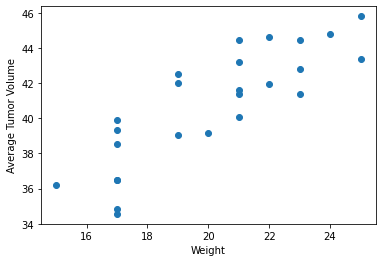

In [91]:
#Rename the "Tumor Volume (mm3)" to average tumor volume
average_tumor_Capomulin_df = average_tumor_Capomulin_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"} )

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
y_axis = average_tumor_Capomulin_df["Average Tumor Volume"]
x_axis =average_tumor_Capomulin_df["Weight (g)"]
plt.scatter(x_axis,y_axis)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


    
x_axis =average_tumor_Capomulin_df["Weight (g)"]

y_axis =average_tumor_Capomulin_df["Average Tumor Volume"]
    
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)
    

0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64


In [45]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


The r-value is: 0.7088568047708717


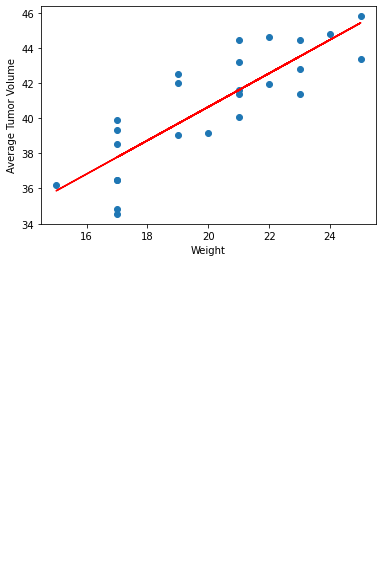

In [82]:
# Create Plot
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()